# TD 4 - La régression linéaire - algo. de descente du gradient

## Packages utiles

In [12]:
from sklearn import datasets # donnees
import os # rep de travail
import pandas as pd # data analysis
from scipy import stats # stat desc
import matplotlib.pyplot as plt # graphiques
import numpy as np # maths
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Les données

In [5]:
#66 Import des données
boston = datasets.load_boston()
print(boston.DESCR)
#0- CRIM     per capita crime rate by town
#1- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#2- INDUS    proportion of non-retail business acres per town
#3- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#4- NOX      nitric oxides concentration (parts per 10 million)
#5- RM       average number of rooms per dwelling
#6- AGE      proportion of owner-occupied units built prior to 1940
#7- DIS      weighted distances to five Boston employment centres
#8- RAD      index of accessibility to radial highways
#9- TAX      full-value property-tax rate per $10,000
#10- PTRATIO  pupil-teacher ratio by town
#11- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#12- LSTAT    % lower status of the population
#13- MEDV     Median value of owner-occupied homes in $1000's


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#-- Récupérer les variables explicatives (X) et leur nom, la variable à expliquer (Y)
X = boston.data
names = boston.feature_names
Y = boston.target

### Analyser et sélectionner les données étudiées

In [8]:
#-- Afficher les statistiques descriptives
print(stats.describe(X))
print(names)
print(stats.describe(Y))

DescribeResult(nobs=506, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])), mean=array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01]), variance=array([7.39865782e+01, 5.43936814e+02, 4.70644425e+01, 6.45129730e-02,
       1.34276357e-02, 4.93670850e-01, 7.92358399e+02, 4.43401514e+00,
       7.58163660e+01, 2.84047595e+04, 4.68698912e+00, 8.33475226e+03,
       5.09947595e+01]), skewness=array([ 5.20765239,  2.21906306,  0.29414628,  3.39579929,  0.72714416,
        0.40241467, -0.59718559,  1.00877876,  1.00183349,  0.6

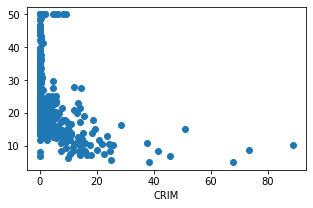

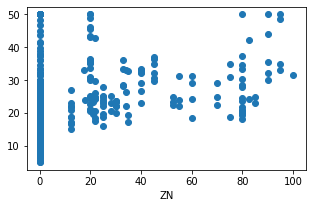

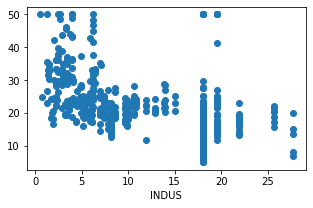

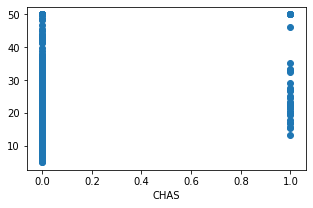

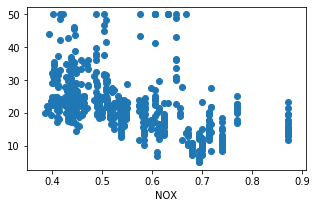

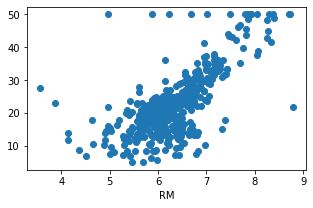

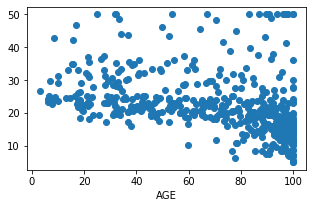

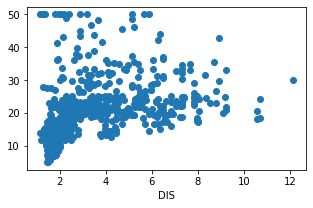

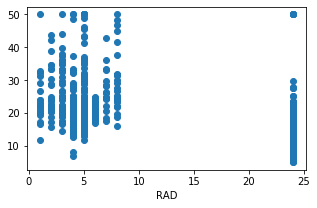

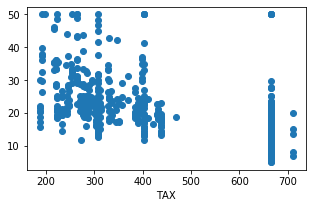

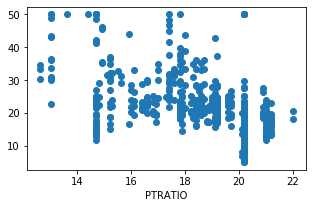

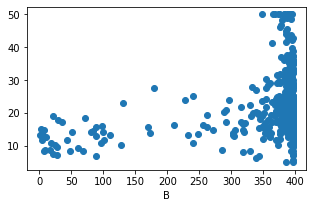

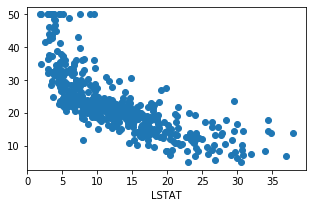

In [9]:
#-- Sélectionner les variables pour la régression simple puis multiple et afficher les (scatterplot)

for i in range(X.shape[1]):
    plt.figure(figsize=(5,3))
    plt.scatter(X[:,i],Y)
    plt.xlabel(names[i])
    plt.show()

In [10]:
#-- Préparer les données étudiées
m,d = X.shape
k = 6
kk = 2

xx = np.hstack((np.ones((m,1)),X))
x1 = np.hstack((np.reshape(xx[:,0],(m,1)), np.reshape(xx[:,k],(m,1))))
x2 = np.hstack((np.reshape(xx[:,0],(m,1)), np.reshape(xx[:,kk],(m,1)), np.reshape(xx[:,k],(m,1))))
print(x2)


[[ 1.    18.     6.575]
 [ 1.     0.     6.421]
 [ 1.     0.     7.185]
 ...
 [ 1.     0.     6.976]
 [ 1.     0.     6.794]
 [ 1.     0.     6.03 ]]


## Algorithme de descente du gradient

Code des fonctions et tests de ces fonctions dans le cas de la régression simple et multiple

ATTENTION : les paramètres des fonctions sont à compléter


In [11]:
#-- Modèle

def f(x,B):
    return np.dot(x,B)

#-- Test 1 - reg simple
B1 = [2,3]
print(f(x1,B1))

#-- Test 2 - reg multiple
B2 = [2,3,1]
print(f(x2,B2))


[21.725 21.263 23.555 22.994 23.441 21.29  20.036 20.516 18.893 20.012
 21.131 20.027 19.667 19.847 20.288 19.502 19.805 19.97  18.368 19.181
 18.71  19.895 20.426 19.439 19.772 18.797 19.439 20.141 21.485 22.022
 19.139 20.216 19.85  19.103 20.288 19.799 19.523 19.55  19.898 21.785
 23.072 22.31  20.507 20.633 20.207 19.046 19.358 20.09  18.197 18.806
 19.889 20.345 21.533 19.994 19.664 23.747 21.149 22.448 20.435 19.781
 19.223 19.898 21.368 22.286 23.312 20.87  19.361 19.634 18.782 19.655
 21.251 19.883 20.195 20.735 20.819 20.858 20.837 20.42  20.696 19.622
 22.181 21.857 20.906 20.501 21.167 21.89  20.045 20.363 23.021 23.237
 21.251 21.215 21.326 20.633 20.747 21.875 20.489 26.207 25.46  24.248
 22.181 22.343 21.215 20.411 20.501 19.553 19.508 20.381 21.422 20.687
 20.585 22.145 19.739 20.276 20.762 19.784 20.528 20.063 19.616 19.193
 19.61  20.012 19.883 19.568 19.637 19.958 18.839 19.079 21.293 18.911
 21.374 20.978 21.116 19.466 19.271 21.005 19.826 21.362 19.571 20.453
 20.52

In [13]:
#%% Fonction-cout
def cout(x,y,B):
    return (np.sum((f(x,B)-y)**2))/(2*x.shape[0])
#%% Test 1 - reg simple
print(cout(x1,Y,B1))
#%% Test 2 - reg multiple
print(cout(x2,Y,B2))

32.38256780928853
2461.537040560277


In [16]:
#%% Gradient
def grad(x,y,B):
    return 1/X.shape[0] * np.dot((f(x,B)-y),x)
#%% Test 1 - reg simple
print(grad(x1,Y,B1))

#%% Test 2 - reg multiple
print(grad(x2,Y,B2))

[ -1.67890316 -13.55777245]
[  19.84273715 1782.0111996   136.01970681]


In [17]:

#--- standardisation des X (données centrées-réduites)
# attention : ne pas standardiser X^0...
def standardisation(X):
    x = X[:,1:]
    return np.hstack((X[:,:1],(x - x.mean(axis=0)) / x.std(axis=0,ddof=0)))
#-- Test 1 - reg simple
print(standardisation(x1))

#-- Test 2 - reg multiple
print(standardisation(x2))

[[ 1.          0.41367189]
 [ 1.          0.19427445]
 [ 1.          1.28271368]
 ...
 [ 1.          0.98496002]
 [ 1.          0.72567214]
 [ 1.         -0.36276709]]
[[ 1.          0.28482986  0.41367189]
 [ 1.         -0.48772236  0.19427445]
 [ 1.         -0.48772236  1.28271368]
 ...
 [ 1.         -0.48772236  0.98496002]
 [ 1.         -0.48772236  0.72567214]
 [ 1.         -0.48772236 -0.36276709]]


In [21]:
#%% Algo de descente du gradient
def grad_descent(init,x,y,pas,epsi,ITE_MAX):
    nbIt = 0
    x_normalize = standardisation(x)
    cout_arr = []
    b_arr = []
    B = np.asarray(init).astype(float)
    new_B = B.copy()
    b_arr.append(B.tolist())
    old_cout = 0
    new_cout = cout(x_normalize,y,B)
    while(np.abs(new_cout-old_cout)>epsi and nbIt < ITE_MAX):
        new_B = B - pas * grad(x_normalize,y,B)
        B = new_B.copy()
        old_cout = new_cout
        new_cout = cout(x_normalize,y,B)
        b_arr.append(B.tolist())
        cout_arr.append(new_cout)
        nbIt += 1
    return b_arr,cout_arr
#-- Test 1  - reg simple
b, c = grad_descent((0,0),x1,Y,0.01,0.01,500)
print(b)
print(c)
#-- Test 2 - reg multiple
print()
b, c = grad_descent((0,0,0),x2,Y,0.05,0.01,500)
print(b)
print(c)

[[0.0, 0.0], [0.22532806324110696, 0.06388975221817343], [0.4484028458498027, 0.12714060691416512], [0.6692468806324112, 0.18975895306319684], [0.8878824750671941, 0.2517511157507382], [1.1043317135576287, 0.31312335681140424], [1.3186164596631589, 0.3738818754614636], [1.530758358307634, 0.4340328089250224], [1.7407788379656646, 0.4935822330539456], [1.9486991128271147, 0.5525361629415795], [2.1545401849399504, 0.6109005535303371], [2.3583228463316575, 0.6686813002132072], [2.5600676811094476, 0.7258842394292485], [2.75979506753946, 0.7825151492531295], [2.9575251801051716, 0.8385797499787716], [3.1532779915452265, 0.8940837046971573], [3.3470732748708807, 0.9490326198683591], [3.5389306053632783, 1.003432045887849], [3.728869362550752, 1.057287477647144], [3.916908732166351, 1.1106043550888458], [4.103067708085795, 1.1633880637561307], [4.287365094246043, 1.2156439353367428], [4.46981950654469, 1.2673772482015486], [4.65044937472035, 1.3185932279377066], [4.829272944214253, 1.3692970

## Test avec plusieurs initialisations : visualisation de la fonction cout et des valeurs des paramètres au cours des itérations

In [19]:
def display(title,data_X,data_Y,data_b,data_c=None):
    print("\nBetas :",data_b[-1])
    plt.figure(1,figsize=(10,6))
    plt.title(title)
    plt.scatter(standardisation(data_X)[:,1],data_Y)
    x_lim = plt.xlim()
    x = np.linspace(x_lim[0],x_lim[1],100)
    y = data_b[0][0] + (x*data_b[0][1])
    plt.plot(x,y,color='green')
    for i in range(1,len(data_b)-1,10): 
        y = data_b[i][0] + (x*data_b[i][1])
        plt.plot(x,y,color='gray')
    y = data_b[-1][0] + (x*data_b[-1][1])
    plt.plot(x,y,color='red')
    plt.xlabel(names[k-1])
    plt.ylabel("Boston House prices")
    plt.show()
    if data_c != None:
        displayCout(data_c,"regression lineaire simple")
    
def display3D(title,data_X,data_Y,data_b,data_c=None):
    print("\nBetas :",data_b[-1])
    fig = plt.figure(1,figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    xx = standardisation(data_X)
    ax.scatter(xx[:,1],xx[:,2],data_Y,c='r', marker='o')
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    x = np.arange(x_lim[0], x_lim[1], 0.05)
    y = np.arange(y_lim[0], y_lim[1], 0.05)
    x, y = np.meshgrid(x, y)
    z = data_b[-1][0] + (x*data_b[-1][1]) + (y*data_b[-1][2])
    z = z.reshape(x.shape)
    ax.plot_wireframe(x,y,z,color='gray')
    ax.set_xlabel(names[kk-1])
    ax.set_ylabel(names[k-1])
    ax.set_zlabel("Boston House prices")
    plt.show()
    if data_c != None:
        displayCout(data_c,"regression lineaire multiple")
    
def displayCout(data_c,title):
    plt.figure(1,figsize=(10,6))
    plt.grid()
    plt.title("Evolution du cout "+title)
    x = np.linspace(0, len(data_c), len(data_c))
    plt.plot(x, data_c)
    plt.xlabel("Nb iterations")
    plt.ylabel("Cout")
    plt.show()


Betas : [22.406070492765547, 6.353040413053022]


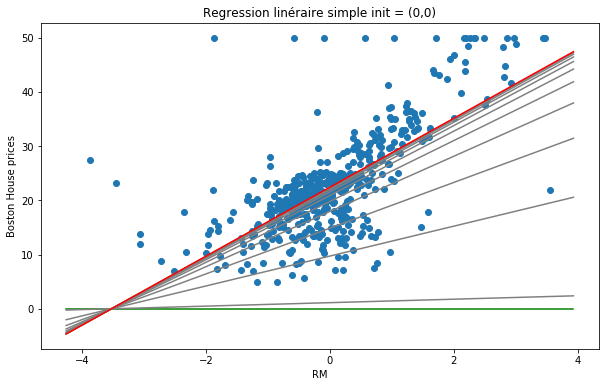

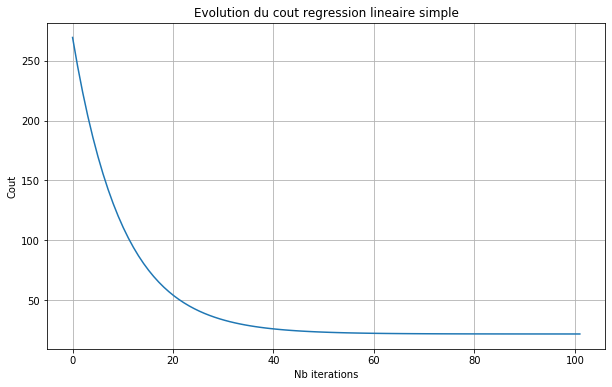


Betas : [22.411735040067686, 6.337951289804988]


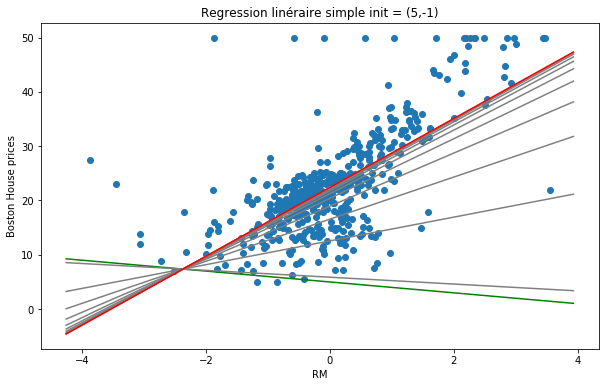

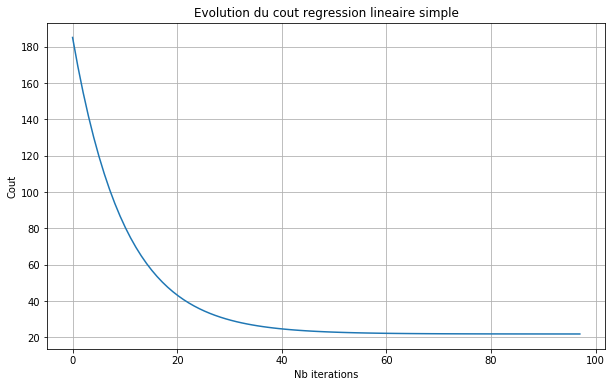


Betas : [22.412407284332872, 1.5199296820757724, 5.866689898479008]


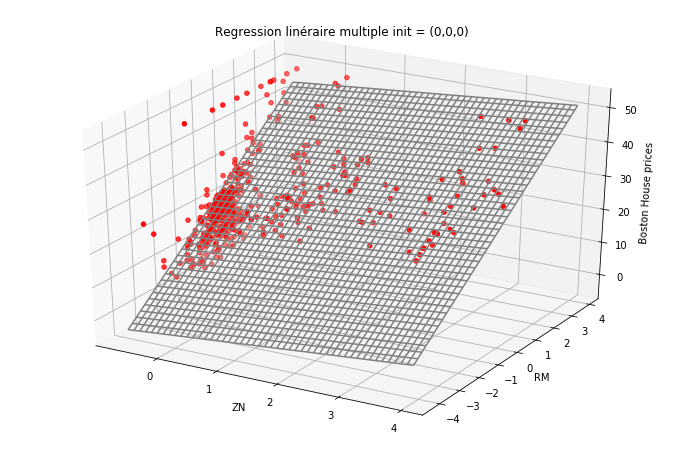

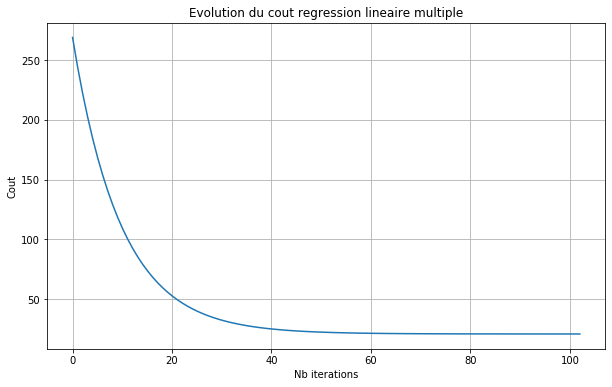


Betas : [22.433861705279174, 1.5475207544295067, 5.835166699467882]


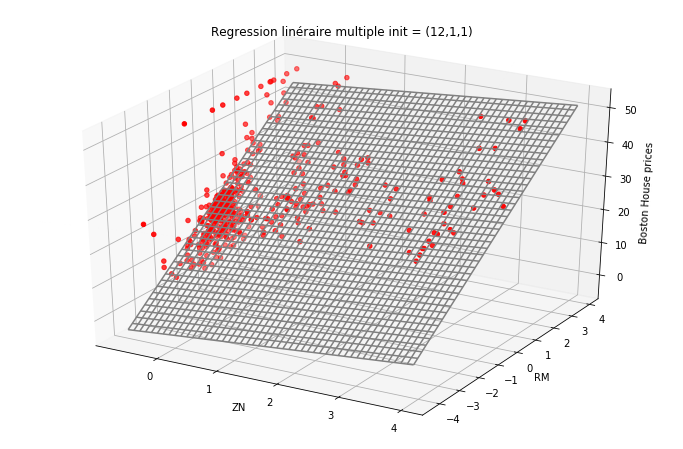

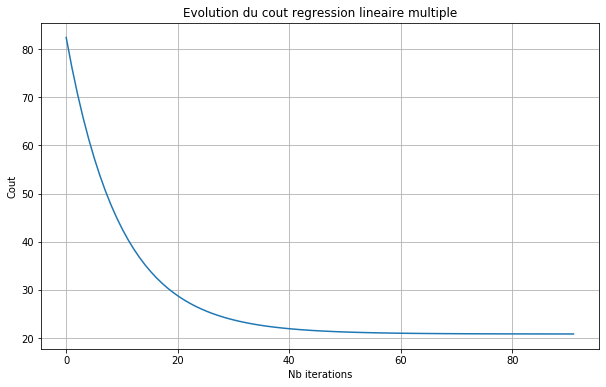

In [20]:
# -- Test 1  - reg simple
b1a, c = grad_descent((0,0),x1,Y,0.05,0.001,500)
display("Regression linéraire simple init = (0,0)",x1,Y,b1a,c)
b, c = grad_descent((5,-1),x1,Y,0.05,0.001,500)
display("Regression linéraire simple init = (5,-1)",x1,Y,b,c)
#-- Test 2 - reg multiple
b1b, c = grad_descent((0,0,0),x2,Y,0.05,0.001,500)
display3D("Regression linéraire multiple init = (0,0,0)",x2,Y,b1b,c)
b, c = grad_descent((12,1,1),x2,Y,0.05,0.001,500)
display3D("Regression linéraire multiple init = (12,1,1)",x2,Y,b,c)

**Commentaires:**


L'initialisation des Betas ne change pas le résultat final, elle détermine juste le nombre d'itérations qu'il va falloir pour y arriver (chance ou pas).

## Test avec plusieurs pas de descente : visualisation de la fonction cout et des valeurs des paramètres au cours des itérations


Betas : [8.869387000535, 2.5148351680674854]


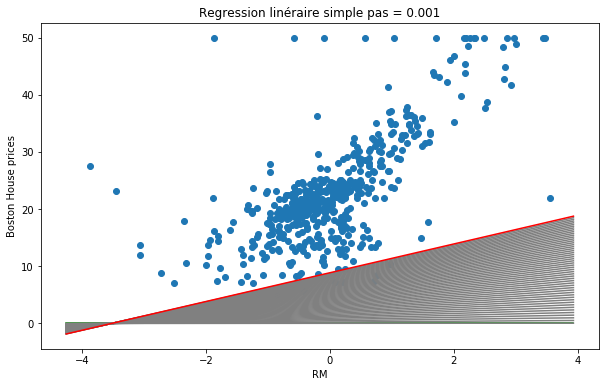


Betas : [21.58241692800185, 6.119500828993046]


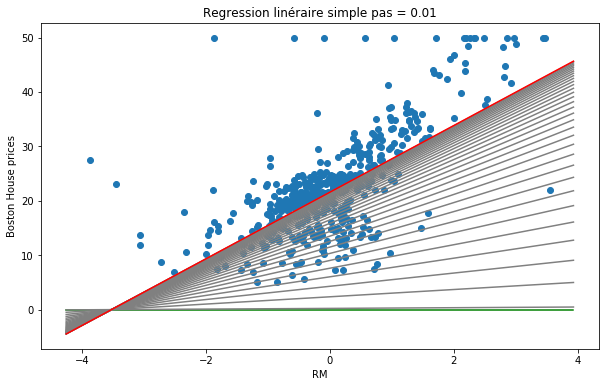


Betas : [22.263031958289528, 6.312483118973122]


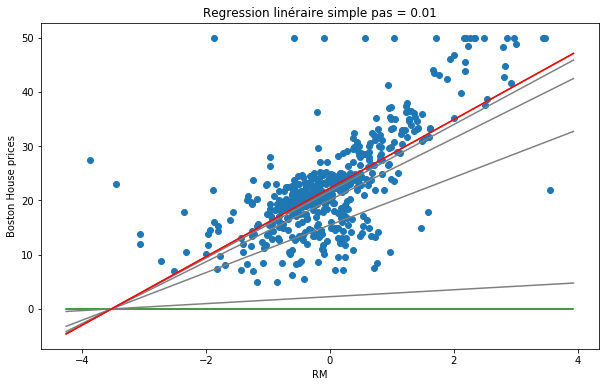


Betas : [8.869387000535006, 1.128220382360806, 2.430458690058276]


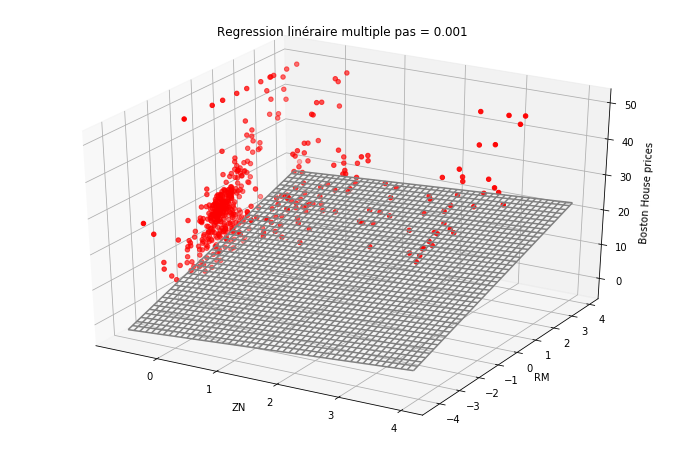


Betas : [21.652898531094287, 1.7637290522481617, 5.423552045352301]


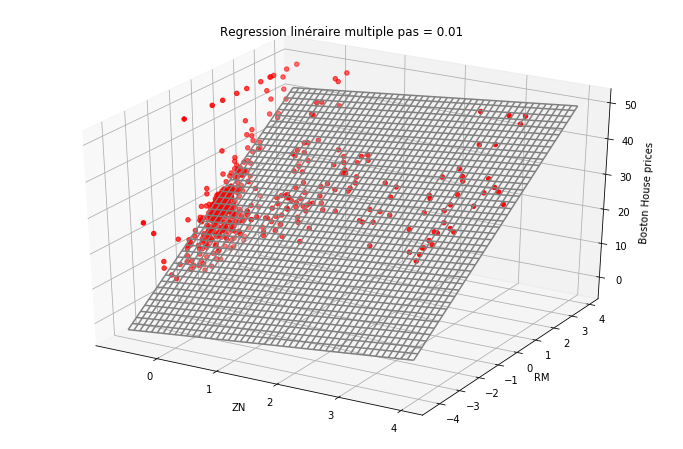


Betas : [22.295519054911704, 1.6154075357782463, 5.744388741165023]


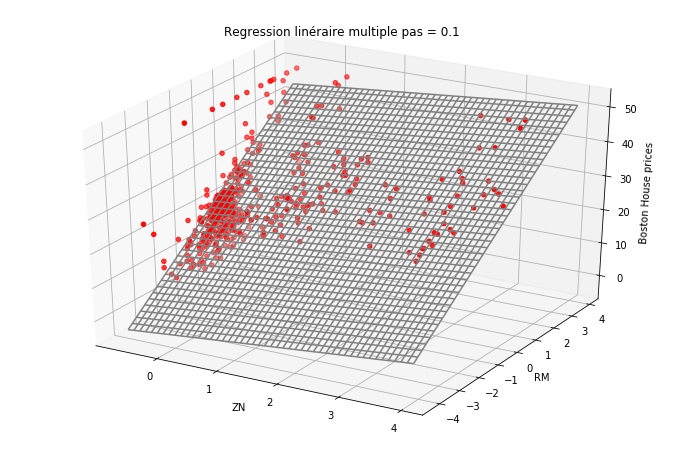

In [114]:
#-- Test 1  - reg simple
b, c = grad_descent((0,0),x1,Y,0.001,0.01,500)
display("Regression linéraire simple pas = 0.001",x1,Y,b)
b, c = grad_descent((0,0),x1,Y,0.01,0.01,500)
display("Regression linéraire simple pas = 0.01",x1,Y,b)
b, c = grad_descent((0,0),x1,Y,0.1,0.01,500)
display("Regression linéraire simple pas = 0.01",x1,Y,b)


#-- Test 2 - reg multiple
b, c = grad_descent((0,0,0),x2,Y,0.001,0.01,500)
display3D("Regression linéraire multiple pas = 0.001",x2,Y,b)
b, c = grad_descent((12,1,1),x2,Y,0.01,0.01,500)
display3D("Regression linéraire multiple pas = 0.01",x2,Y,b)
b, c = grad_descent((12,1,1),x2,Y,0.1,0.01,500)
display3D("Regression linéraire multiple pas = 0.1",x2,Y,b)

**Commentaires:**

On remarque qu'un pas trop petit demande trop d'itérations avant d'arriver au résultat (sortie avec ITE_MAX). Un pas trop grand lui peut créer une divergence (va et vient entre 2 valeurs).

## Commentaires
**pour le choix du critère d'arrêt:**


Le critère d'arrêt dépend donc d'un nombre d'itérations max qui est donné et de la différence entre le nouveau et l'ancien cout qui ne doit pas être inférieure à une valeur donnée aussi. Donc on remarque donc que le résultat est fortément dépendant des paramètres au départ.


**pour la standardisation des données:**

Le fait de standardiser les données permet de gagner en temps d'exécution car les valeurs calculées des Betas seront relativement proches (hypothèse).



## Comparaison avec les résultats du maximum de vraisemblance

Betas trouvés avec la regression linéaire : [22.406070492765547, 6.353040413053022]
Différence :  0.16267064010944043

Betas : [22.53280632  6.38897522]


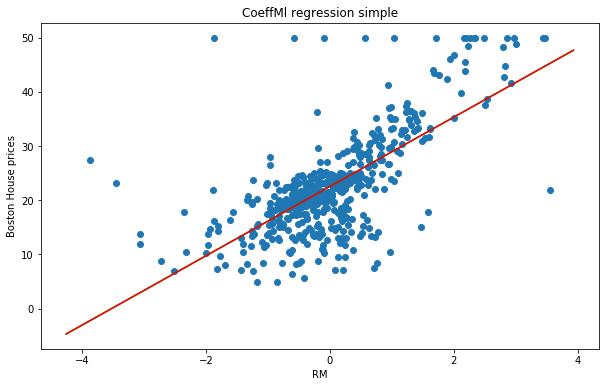

Betas trouvés avec la regression linéaire : [22.406070492765547, 6.353040413053022]
Différence :  0.24625096714650652

Betas : [22.53280632  1.46065307  5.93326521]


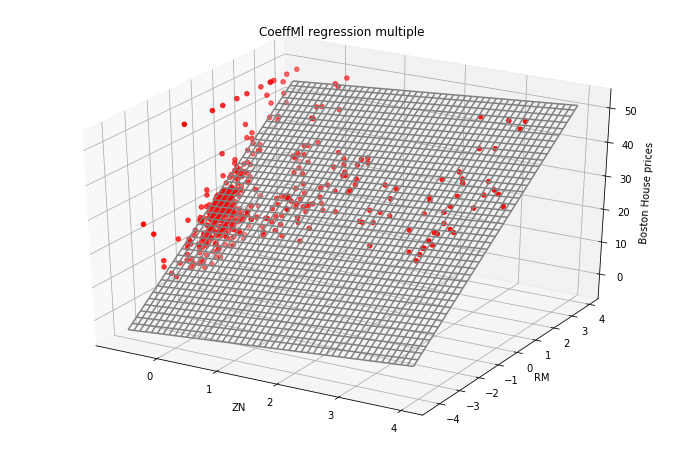

In [115]:
#-- Pour comparer avec le maximum de vraisemblance
#(X^T X)^-1 X^T Y
def coef_ml(x,y):
    x_standard = standardisation(x)
    trans = np.transpose(x_standard)
    return np.dot(np.dot(np.linalg.inv(np.dot(trans,x_standard)),trans),y)
    
#-- Test 1  - reg simple
maxi1 = coef_ml(x1,Y)
print("Betas trouvés avec la regression linéaire :",b1a[-1])
print("Différence : ",np.sum(np.abs(maxi1-b1a[-1])))
display("CoeffMl regression simple",x1,Y,[maxi1])

#-- Test 2 - reg multiple
maxi2 = coef_ml(x2,Y)
print("Betas trouvés avec la regression linéaire :",b1a[-1])
print("Différence : ",np.sum(np.abs(maxi2-b1b[-1])))
display3D("CoeffMl regression multiple",x2,Y,[maxi2])
#-- (ou bien utiliser la fonction native de sklearn)

**Commentaires:**

La différence entre les Betas de la régression linéaire et les Betas du maximum de vraisemblance est relativement faible.
Je pense qu'elle est acceptable.